<a href="https://colab.research.google.com/github/rajat10-01/Shell_AI/blob/main/Shell_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install windrose
import numpy as np
import pandas as pd
import seaborn as sns
from windrose import WindroseAxes
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!git clone https://github.com/rajat10-01/Shell_AI

Cloning into 'Shell_AI'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 19 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.


In [3]:
%cd Shell_AI/

/content/Shell_AI


In [4]:
!ls

Farm_Evaluator.py      wind_data_2007.csv  wind_data_2014.csv
Farm_Evaluator_Vec.py  wind_data_2008.csv  wind_data_2015.csv
power_curve.csv        wind_data_2009.csv  wind_data_2017.csv
turbine_loc_test.csv   wind_data_2013.csv


In [5]:
exec(open('Farm_Evaluator.py').read())

In [12]:
turb_coords    =  getTurbLoc('turbine_loc_test.csv')
    
# Load the power curve
power_curve    =  loadPowerCurve('power_curve.csv')
    
# Pass wind data csv file location to function binWindResourceData.
# Retrieve probabilities of wind instance occurence.
wind_inst_freq =  binWindResourceData('wind_data_2007.csv')
    
# check if there is any constraint is violated before we do anything. Comment 
# out the function call to checkConstraints below if you desire. Note that 
# this is just a check and the function does not quantifies the amount by 
# which the constraints are violated if any. 
checkConstraints(turb_coords, turb_diam)
     
print('Calculating AEP......')
AEP = totalAEP(turb_diam, turb_coords, power_curve, wind_inst_freq) 
print('Total power produced by the wind farm is: ', "%.12f"%(AEP), 'GWh')

 33%|███▎      | 12/36 [00:00<00:00, 112.72it/s]

Both perimeter and proximity constraints are satisfied !!

Calculating AEP......


100%|██████████| 36/36 [00:00<00:00, 113.01it/s]

Total power produced by the wind farm is:  505.450636596680 GWh


In [21]:
df_wind = pd.read_csv('wind_data_2008.csv')
df_wind.head()

,date,drct,sped
0,2008-01-01 00:20,120.0,4.365722
1,2008-01-01 00:50,140.0,4.538230
2,2008-01-01 01:20,150.0,5.382728
3,2008-01-01 01:50,160.0,6.025091
4,2008-01-01 02:20,150.0,4.957855


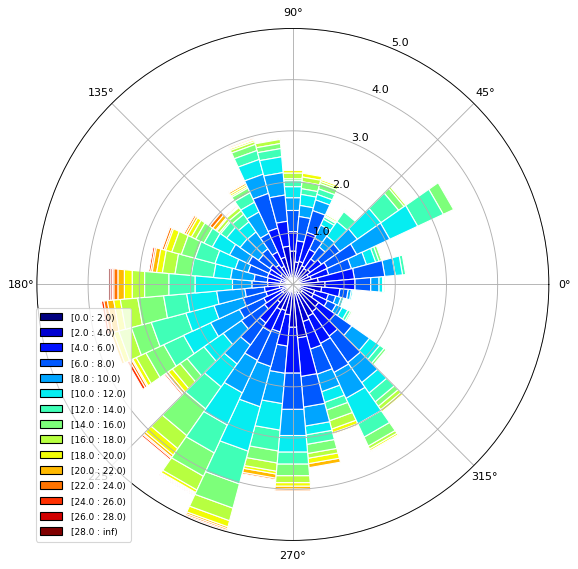

In [22]:
bin_arr = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28]
ax = WindroseAxes.from_ax()
ax.bar(df_wind['drct'], df_wind['sped'], normed=True, opening=1, bins= bin_arr, nsector=36, edgecolor='white')
ax.set_legend()
plt.show()